<a href="https://colab.research.google.com/github/Son-github/DeepLearning_PyTroch-1/blob/main/%08DeepLearning_with_PyTorch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **소프트맥스 회귀**

1) 소프트맥스 회귀의 비용 함수 구현

low level

In [ ]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

In [ ]:
z = torch.FloatTensor([1, 2, 3])

In [ ]:
hypothesis = F.softmax(z, dim=0) #dim=0은 첫번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum()

tensor(1.)

In [ ]:
z = torch.rand(3, 5, requires_grad=True)

In [ ]:
hypothesis = F.softmax(z, dim=1) #dim=1은 두번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [ ]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) 
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # unsqueeze(1)은 (3,)의 크기를 가졌던 y 텐서를 (3 x 1)텐서로 만듬
# scatter의 첫번째 인자로 dim=1에 대해서 수행하라고 알려주고, 세번째 인자에 숫자 1을 넣어주므로서 두번째 인자인 y_unsqeeze(1)이 알려주는 위치에 숫자 1을 넣도록 함

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [ ]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


In [ ]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


high level

In [ ]:
#Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [ ]:
#High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [ ]:
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [ ]:
F.cross_entropy(z, y) #비용함수와 소프트맥스 함수까지 포함하고 있음

tensor(1.4689, grad_fn=<NllLossBackward0>)

2) 소프트맥스 회귀 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [2]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

low level

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(y_train)

torch.Size([8, 4])
torch.Size([8])
tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]])
tensor([2, 2, 2, 1, 1, 1, 0, 0])


In [18]:
y_one_hot = torch.zeros(8, 3)
print(y_one_hot)
print(y_train.unsqueeze(1))
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1) # unsqueeze(1)은 (8,)의 크기를 가졌던 y 텐서를 (8 x 1)텐서로 만듬
# scatter의 첫번째 인자로 dim=1에 대해서 수행하라고 알려주고, 세번째 인자에 숫자 1을 넣어주므로서 두번째 인자인 y_unsqeeze(1)이 알려주는 위치에 숫자 1을 넣도록 함
print(y_one_hot) # y_train의 0~2인덱스까지 2이므로 각 2번째 인덱스에 1이 들어감. 나머지도 마찬거자

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[2],
        [2],
        [2],
        [1],
        [1],
        [1],
        [0],
        [0]])
tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])


In [19]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1,3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [21]:
nb_epoch = 1000
for epoch in range(nb_epoch+1):

  # hypothesis
  hypothesis = F.softmax(x_train.matmul(W)+b, dim=1) # 두번째 차원에 소프트맥스 함수를 적용한다는 의미에서 dim=1을 씀 
  
  # cost
  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epoch, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.622999
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467661
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285072
Epoch 1000/1000 Cost: 0.248155


In [22]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
# optimizer
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epoch+1):

  # cost
  z = x_train.matmul(W) + b
  cost = F.cross_entropy(z, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


소프트맥스 회귀 nn.Module로 구현

In [24]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3
model = nn.Linear(4, 3)

optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(nb_epochs+1):

  # H(x) 계산
  prediction = model(x_train)

  # cost
  cost = F.cross_entropy(prediction, y_train)

  # cost로 H(x) 계산
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428280
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


소프트맥스 회귀 클래스로 구현

In [25]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)

  def forward(self, x):
    return self.linear(x)

In [26]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(nb_epoch+1):
   
   # H(x)
   prediction = model(x_train)

   # cost
   cost = F.cross_entropy(prediction, y_train)

   # cost사용해 H(x)계산
   optimizer.zero_grad()
   cost.backward()
   optimizer.step()
   
   if epoch%100==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()
    ))
   

Epoch    0/1000 Cost: 1.366217
Epoch  100/1000 Cost: 0.722726
Epoch  200/1000 Cost: 0.637564
Epoch  300/1000 Cost: 0.578576
Epoch  400/1000 Cost: 0.527363
Epoch  500/1000 Cost: 0.479316
Epoch  600/1000 Cost: 0.432700
Epoch  700/1000 Cost: 0.386693
Epoch  800/1000 Cost: 0.340930
Epoch  900/1000 Cost: 0.295757
Epoch 1000/1000 Cost: 0.255350


소프트맥스 회귀로 MNIST 테이터 분류

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [2]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# hyperparameters
training_epochs = 15
batch_size = 100

In [3]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

'''
첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로
두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴
세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환 
네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미
'''

100%|██████████| 9912422/9912422 [00:00<00:00, 430992704.55it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 106727483.55it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 167345594.81it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17871040.12it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



'\n첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로\n두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴\n세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환 \n네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미\n'

In [4]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)
'''
첫번째 인자인 dataset은 로드할 대상을 의미 
두번째 인자인 batch_size는 배치 크기
shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부
drop_last는 마지막 배치를 버릴 것인지를 의미
drop_last를 하는 이유는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줌.
'''

'\n첫번째 인자인 dataset은 로드할 대상을 의미 \n두번째 인자인 batch_size는 배치 크기\nshuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부\ndrop_last는 마지막 배치를 버릴 것인지를 의미\ndrop_last를 하는 이유는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줌.\n'

In [5]:
linear = nn.Linear(784, 10, bias=True).to(device)
# to() 함수는 연산을 어디서 수행할지를 정함. gpu를 사용하려면 to('cuda')를 해주어야함
# bias는 편향 b를 사용할 것인지 나타냄

In [7]:
# cost function과 optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    #  배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 됨
    X = X.view(-1, 28 * 28).to(device)
    # 레이블은 원_핫 인코딩이 된 상태가 아니라 0~9의 정수
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


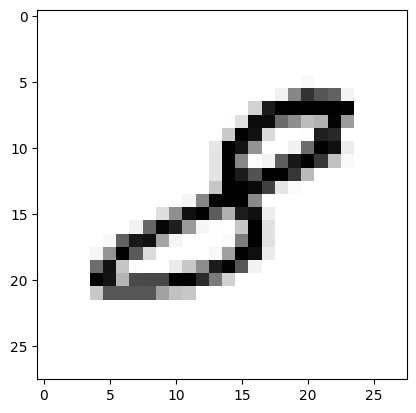

In [9]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()